In [8]:
import pandas as pd
    
#define the file p
csv_file_path = "C:\\Users\\DEEPIKA\\Downloads\\diabetes_check_dataset.csv"
excel_file_path ="C:\\Users\\DEEPIKA\\Downloads\\transaction_dataset.xlsx"


#load the csv file
data_csv=pd.read_csv(csv_file_path)
print("csv file data:")
print(data_csv)

#load the excel file
data_excel=pd.read_excel(excel_file_path)
print("\n excel file data:")
print(data_excel)

#basic data exploration
print("\n data description:")
print("csv data description:")
print(data_csv.describe())
print("\n excel data description:")
print(data_excel.describe())

#displaying data types
print("\n data types in excel file:")
print(data_excel.dtypes)
print("\n data types in csv file:")
print(data_csv.dtypes)




csv file data:
   patient_id  gender age_group  blood_sugar_level   BMI family_history  \
0        D001    Male       <30              100.5  20.1            Yes   
1        D002  Female     30-40              131.0  22.2             No   
2        D003    Male     40-50              161.5  24.3            Yes   
3        D004  Female     50-60              192.0  26.4             No   
4        D005    Male       60+               72.5  28.5            Yes   
5        D006  Female       <30              103.0  30.6             No   
6        D007    Male     30-40              133.5  32.7            Yes   
7        D008  Female     40-50              164.0  34.8             No   
8        D009    Male     50-60              194.5  36.9            Yes   
9        D010  Female       60+               75.0  19.0             No   
10       D011    Male       <30              105.5  21.1            Yes   
11       D012  Female     30-40              136.0  23.2             No   
12       D

C:\Users\DEEPIKA\AppData\Local\Temp\ipykernel_25504\2314981567.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('Workout Hour Range')['Fitness Score'].mean()


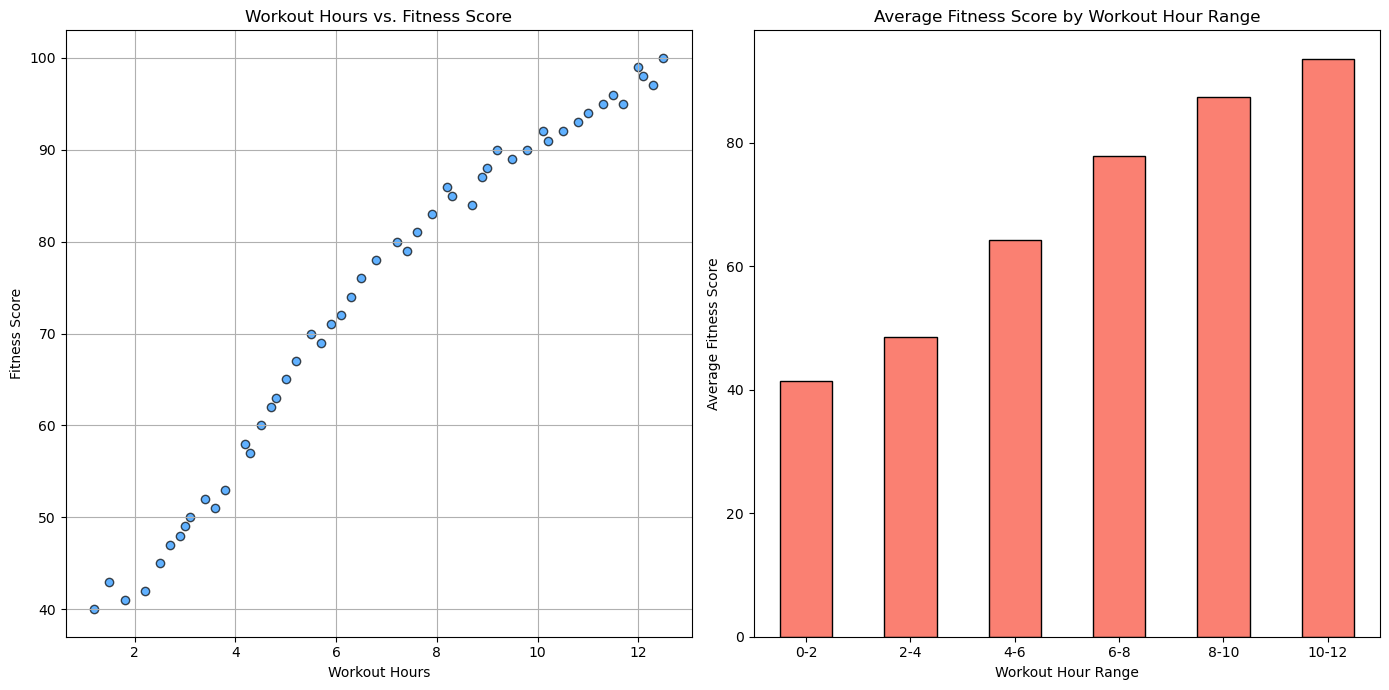

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load new dataset
data = pd.read_csv("C:\\Users\\DEEPIKA\\Desktop\\workout_vs_fitness.csv")

# Create figure
plt.figure(figsize=(14,7))

# Scatter plot: Workout Hours vs Fitness Score
plt.subplot(1, 2, 1)
plt.scatter(data['Workout Hours'], data['Fitness Score'], color='dodgerblue', edgecolor='k', alpha=0.7, marker='o')
plt.title('Workout Hours vs. Fitness Score')
plt.xlabel('Workout Hours')
plt.ylabel('Fitness Score')
plt.grid(True)

# Binning workout hours
bins = [0, 2, 4, 6, 8, 10, 12] 
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12']
data['Workout Hour Range'] = pd.cut(data['Workout Hours'], bins=bins, labels=labels, right=False)

# Bar plot: Average Fitness Score by Workout Hour Range
grouped_data = data.groupby('Workout Hour Range')['Fitness Score'].mean()
plt.subplot(1, 2, 2)
grouped_data.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Fitness Score by Workout Hour Range')
plt.xlabel('Workout Hour Range')
plt.ylabel('Average Fitness Score')
plt.xticks(rotation=0)

# Show plots
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
data={
    'Age':[25,30,None,28,35],
    'Gender':['female','male','male','female','male'],
    'Income':[50000,60000,45000,None,70000]
}
df=pd.DataFrame(data)
imputer=SimpleImputer(strategy='mean')
df[['Age','Income']]=imputer.fit_transform(df[['Age','Income']])
print("Data after handling missing values:")
print(df)
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[['Gender']]).toarray()
encoded_df=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))
print("\n Data after categorical encoding:")
print(encoded_df)
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[['Age','Income']])
scaled_df=pd.DataFrame(scaled_data,columns=['Scaled Age','Scaled Income'])
print("\n Data after feature scaling:")
print(scaled_df)

Data after handling missing values:
    Age  Gender   Income
0  25.0  female  50000.0
1  30.0    male  60000.0
2  29.5    male  45000.0
3  28.0  female  56250.0
4  35.0    male  70000.0

 Data after categorical encoding:
   Gender_female  Gender_male
0            1.0          0.0
1            0.0          1.0
2            0.0          1.0
3            1.0          0.0
4            0.0          1.0

 Data after feature scaling:
   Scaled Age  Scaled Income
0   -1.382164      -0.727778
1    0.153574       0.436667
2    0.000000      -1.310001
3   -0.460721       0.000000
4    1.689312       1.601112


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = np.array([[80,75],[95,90],[60,50],[45,30],[30,40],[85,95],[70,60],[50,55],[40,45],[60,70]])
y = np.array([1,1,0,0,0,1,1,0,0,1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy on the test set: {:.2f}".format(accuracy))
exam_score1 = float(input("Enter Exam score 1: "))
exam_score2 = float(input("Enter Exam Score 2: "))
user_input = np.array([[exam_score1, exam_score2]])
predicted_outcome = knn.predict(user_input)
if predicted_outcome[0] == 1:
    print("Based on the exam scores provided, the student is predicted  to pass.")
else:
    print("Based on the exam scores provided,the student is predicted to fail.")

Accuracy on the test set: 1.00


Enter Exam score 1:  89
Enter Exam Score 2:  82


Based on the exam scores provided, the student is predicted  to pass.


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=np.array([[1000,2],[1500,3],[1200,2],[1800,4],[900,2]])
y=np.array([300000,400000,350000,280000,450000])
model=LinearRegression()
model.fit(x,y)
size=float(input("enter the size of the house in sqft:"))
bedrooms=int(input("enter the number of bedrooms:"))
new_data=np.array([[size,bedrooms]])
predicted_price=model.predict(new_data)
print("predicted price for a house with size{} sqft and{} bedrooms: Rs.{:.2f}".format(size,bedrooms,predicted_price[0]))

enter the size of the house in sqft: 300
enter the number of bedrooms: 2


predicted price for a house with size300.0 sqft and2 bedrooms: Rs.474819.28


Decision Tree Classifier Rules:
 |--- Texture <= 0.50
|   |--- class: Apple
|--- Texture >  0.50
|   |--- Weight <= 185.00
|   |   |--- class: Orange
|   |--- Weight >  185.00
|   |   |--- class: Melon



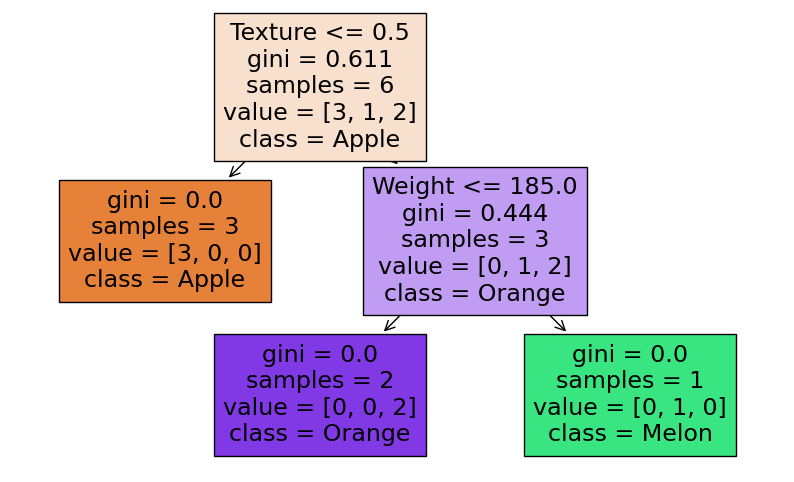

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import export_text
import matplotlib.pyplot as plt
X = np.array([[150,0],[170,1],[120,0],[140,1],[200,1],[130,0]])
y = np.array(['Apple','Orange','Apple','Orange','Melon','Apple'])
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X,y)
tree_rules = export_text(clf, feature_names=['Weight', 'Texture'])
print("Decision Tree Classifier Rules:\n",tree_rules)
plt.figure(figsize=(10,6))
plot_tree(clf,filled=True,feature_names=['Weight', 'Texture'],class_names=np.unique(y))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


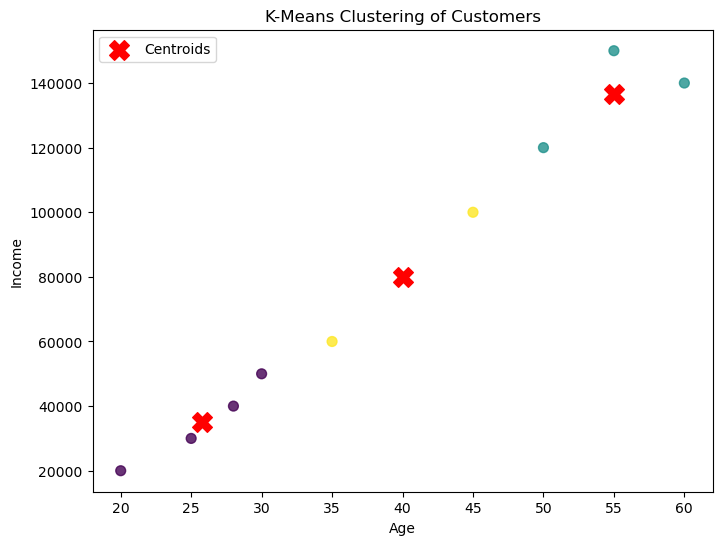

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X=np.array([[30,50000],[35,60000],[40,80000],[25,30000],[45,100000],[20,20000],[50,120000],[55,150000],[60,140000],[28,40000]])
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=labels, cmap='viridis',s=50,alpha=0.8)
plt.scatter(centers[:,0],centers[:,1], c='red',s=200,marker='X',label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()